<a href="https://colab.research.google.com/github/obaileyw-uncc/ecgr5105/blob/main/hw05_pytorch/hw05_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECGR 5105 Homework 5: PyTorch and Neural Networks on the CPU
**Owen Bailey-Waltz (801488178)**

In [1]:
# import required packages, load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
# import seaborn as sns
# from sklearn import datasets, metrics
# from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from IPython.display import display

## Problem 1: Temperature model

In [2]:
# temperature example from the lecture
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

def model(t_u, w2, w, b):
  t_p = torch.zeros((len(t_u)))
  #display(params)
  for i in range(0, len(t_u)):
    t_p[i] = w2 * t_u[i] ** 2 + w * t_u[i] + b
  return t_p
  #return w * t_u + b

def loss_fn(t_p, t_c):
  squared_diff = (t_p - t_c) ** 2
  #print(squared_diff.mean())
  return squared_diff.mean()

In [3]:
w = torch.ones((2))
b = torch.zeros(())
t_p = model(t_u, *w, b)
display(t_p)

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [4]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
t_p = model(t_u, *params)
display(t_p)
loss = loss_fn(t_p, torch.tensor(t_c))
loss.backward()
params.grad

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600],
       grad_fn=<CopySlices>)

/tmp/ipython-input-983168778.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = loss_fn(t_p, torch.tensor(t_c))


tensor([2.3149e+07, 3.6181e+05, 5.9642e+03])

In [5]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_()

    t_p = model(t_u, *params)
    #display(t_p)
    loss = loss_fn(t_p, t_c)
    #print(loss)
    loss.backward()

    with torch.no_grad():
      params -= learning_rate * params.grad

    if epoch % 500 == 0:
      print('Epoch {}: loss = {}'.format(epoch, float(loss)))

  return params

In [6]:
parameters = torch.zeros((3))
t_un = 0.1 * t_u  # input feature scaling from example to encourage convergence
# print(t_un)
training_loop(
    n_epochs=5000,
    learning_rate=1e-1,
    params=torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
    t_u=t_un,
    t_c=t_c
)

/tmp/ipython-input-837479432.py:16: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  print('Epoch {}: loss = {}'.format(epoch, float(loss)))


Epoch 500: loss = nan
Epoch 1000: loss = nan
Epoch 1500: loss = nan
Epoch 2000: loss = nan
Epoch 2500: loss = nan
Epoch 3000: loss = nan
Epoch 3500: loss = nan
Epoch 4000: loss = nan
Epoch 4500: loss = nan
Epoch 5000: loss = nan


tensor([nan, nan, nan], requires_grad=True)

In [7]:
training_loop(
    n_epochs=5000,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
    t_u=t_un,
    t_c=t_c
)

Epoch 500: loss = nan
Epoch 1000: loss = nan
Epoch 1500: loss = nan
Epoch 2000: loss = nan
Epoch 2500: loss = nan
Epoch 3000: loss = nan
Epoch 3500: loss = nan
Epoch 4000: loss = nan
Epoch 4500: loss = nan
Epoch 5000: loss = nan


tensor([nan, nan, nan], requires_grad=True)

In [8]:
training_loop(
    n_epochs=5000,
    learning_rate=1e-3,
    params=torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
    t_u=t_un,
    t_c=t_c
)

Epoch 500: loss = nan
Epoch 1000: loss = nan
Epoch 1500: loss = nan
Epoch 2000: loss = nan
Epoch 2500: loss = nan
Epoch 3000: loss = nan
Epoch 3500: loss = nan
Epoch 4000: loss = nan
Epoch 4500: loss = nan
Epoch 5000: loss = nan


tensor([nan, nan, nan], requires_grad=True)

In [73]:
model_params = training_loop(
    n_epochs=5000,
    learning_rate=1e-4,
    params=torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
    t_u=t_un,
    t_c=t_c
)
model([3.2, 5.0, 6.8, 8.6, 10.4, 12.2], *model_params)

Epoch 500: loss = 10.708597183227539
Epoch 1000: loss = 8.642083168029785
Epoch 1500: loss = 7.1710052490234375
Epoch 2000: loss = 6.123478412628174
Epoch 2500: loss = 5.377228260040283
Epoch 3000: loss = 4.845286846160889
Epoch 3500: loss = 4.465787887573242
Epoch 4000: loss = 4.1947245597839355
Epoch 4500: loss = 4.0008015632629395
Epoch 5000: loss = 3.8617441654205322


tensor([ 1.9865,  8.6093, 18.8415, 32.6830, 50.1338, 71.1941],
       grad_fn=<CopySlices>)

In [65]:
# linear model for comparison
5.3671 * np.array([3.2, 5.0, 6.8, 8.6, 10.4, 12.2]) - 17.3012

array([-0.12648,  9.5343 , 19.19508, 28.85586, 38.51664, 48.17742])

Trainings using learning rates of 0.1, 0.01, and 0.001 all fail to converge when applying the same input feature scaling (multiplication by 0.1) as the example from the text. A learning rate of 0.0001 leads to a convergent result for our quadratic model, however the training takes longer than the linear model to converge (the linear model is convergent shortly after 2500 epochs while the quadratic takes the full 5000) and gives a weaker convergence (training loss of 3.86 in the quadratic model compared to 2.93 in the linear model). Comparing our quadratic model with the linear model from the example with some example values also shows clearly that the quadratic model underperforms the linear model, particularly on the higher end where values begin to diverge rapidly.

### (c) Comparison with linear model

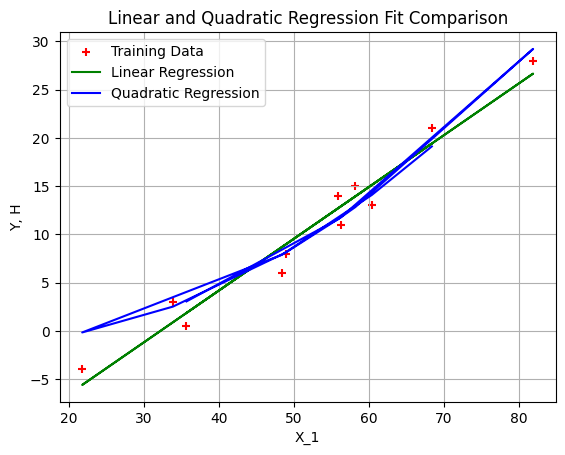

In [74]:
# plot the linear regression fit from the lecture and the obtained quadratic
# regression fit
t_ct = model(t_un, *model_params)
plt.scatter(t_u, t_c, color='red', marker='+', label='Training Data')
plt.plot(t_u, (5.3671 * t_un - 17.3012), color='green',
         label='Linear Regression')
plt.plot(t_u, t_ct.detach(), color='blue',
         label='Quadratic Regression')
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('Y, H')
plt.title('Linear and Quadratic Regression Fit Comparison')
plt.legend()
plt.show()

Visual comparison of the quadratic and linear regression results shows that the quadratic regression model fits tightly in the central region and moves to match what it perceives as a nonlinearity on the upper end but loses fit quality near the lower end.

## Problem 2: PyTorch housing dataset linear regression

In [11]:
# bring in the housing data
drive.mount('/content/drive/')
file_path = '/content/drive/MyDrive/datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
# perform pre-processing - split training and validation sets, normalize data
housing[housing == 'yes'] = 1
housing[housing == 'no'] = 0
housing_train, housing_val = train_test_split(housing,
                                                 train_size=0.8, test_size=0.2,
                                                 random_state=0)
scaler = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing_train[num_vars] = scaler.fit_transform(housing_train[num_vars])
housing_val[num_vars] = scaler.transform(housing_val[num_vars])
housing_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
542,1750000,-0.716772,-1.294376,-0.573307,-0.933142,1,0,0,0,0,-0.819149,0,unfurnished
496,2695000,-0.538936,-1.294376,-0.573307,-0.933142,1,0,0,0,0,-0.819149,0,unfurnished
484,2870000,-0.988206,-1.294376,-0.573307,-0.933142,0,0,0,0,0,-0.819149,0,unfurnished
507,2590000,-0.726132,-1.294376,-0.573307,-0.933142,1,0,0,0,0,-0.819149,0,unfurnished
252,4515000,2.203478,0.052516,-0.573307,-0.933142,1,0,0,0,0,-0.819149,0,semi-furnished


In [13]:
y_train = housing_train.pop('price')
X_train = housing_train[num_vars]
y_val = housing_val.pop('price')
X_val = housing_val[num_vars]


In [14]:
# general purpose linear model function
def model_linear(X, theta):
  return torch.matmul(X, theta)

In [15]:
# training loop for vanilla GD
def model_train_vanilla(n_epochs, params, learning_rate, X_train, X_val, y_train, y_val):
  for epoch in range(1, n_epochs + 1):
    h_train = model_linear(X_train, params)
    loss_train = loss_fn(y_train, h_train)
    h_val = model_linear(X_val, params)
    loss_val = loss_fn(y_val, h_val)
    loss_train.backward()

    with torch.no_grad():
      params -= learning_rate * params.grad

    if epoch <= 3 or epoch % 500 == 0:
      print('Epoch {}: training loss {:.4f}, validation loss {:.4f}'.format(epoch, loss_train.item(), loss_val.item()))

  return params

In [16]:
X_train = torch.tensor(np.hstack((np.ones((len(X_train),1)), X_train.to_numpy())), dtype=torch.float32)
X_val = torch.tensor(np.hstack((np.ones((len(X_val),1)), X_val.to_numpy())), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
y_val = torch.tensor(y_val.to_numpy(), dtype=torch.float32)

In [17]:
theta = torch.tensor([0.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
alpha = 0.1
model_train_vanilla(
    n_epochs=5000,
    params=theta,
    learning_rate=alpha,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val
)

Epoch 1: training loss 26469969428480.0000, validation loss 25189234507776.0000
Epoch 2: training loss 17069219250176.0000, validation loss 16039514472448.0000
Epoch 3: training loss 6108121399296.0000, validation loss 5530513309696.0000
Epoch 500: training loss 12828084797440.0000, validation loss 11918264762368.0000
Epoch 1000: training loss 2833530486784.0000, validation loss 2096997335040.0000
Epoch 1500: training loss 11911984840704.0000, validation loss 11627776704512.0000
Epoch 2000: training loss 25025251901440.0000, validation loss 24685144178688.0000
Epoch 2500: training loss 21301186002944.0000, validation loss 21407643729920.0000
Epoch 3000: training loss 7180615942144.0000, validation loss 7556038656000.0000
Epoch 3500: training loss 5497360482304.0000, validation loss 5760493289472.0000
Epoch 4000: training loss 18916600446976.0000, validation loss 18783261425664.0000
Epoch 4500: training loss 25746215010304.0000, validation loss 25026097053696.0000
Epoch 5000: training l

tensor([ 100636.2500,  534548.0000, -145352.3750,  154401.1562, -150380.0156,
         192144.6719], requires_grad=True)

In [18]:
theta = torch.tensor([0.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
alpha = 0.01
model_train_vanilla(
    n_epochs=5000,
    params=theta,
    learning_rate=alpha,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val
)

Epoch 1: training loss 26469969428480.0000, validation loss 25189234507776.0000
Epoch 2: training loss 25423272476672.0000, validation loss 24166870810624.0000
Epoch 3: training loss 23422945984512.0000, validation loss 22214883672064.0000
Epoch 500: training loss 3110154797056.0000, validation loss 3066984660992.0000
Epoch 1000: training loss 24653651247104.0000, validation loss 24607765561344.0000
Epoch 1500: training loss 2589942349824.0000, validation loss 1873746329600.0000
Epoch 2000: training loss 24334229831680.0000, validation loss 24230752157696.0000
Epoch 2500: training loss 6307038363648.0000, validation loss 5351205765120.0000
Epoch 3000: training loss 21790629822464.0000, validation loss 22328433967104.0000
Epoch 3500: training loss 7439472132096.0000, validation loss 6615125196800.0000
Epoch 4000: training loss 17636530323456.0000, validation loss 16775253065728.0000
Epoch 4500: training loss 12284808134656.0000, validation loss 12157555048448.0000
Epoch 5000: training l

tensor([7718130.5000,  251485.4844,  -39377.5703,  -10331.5938,  -38914.4453,
         -49709.8594], requires_grad=True)

In [19]:
theta = torch.tensor([0.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
alpha = 0.001
model_train_vanilla(
    n_epochs=5000,
    params=theta,
    learning_rate=alpha,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val
)

Epoch 1: training loss 26469969428480.0000, validation loss 25189234507776.0000
Epoch 2: training loss 26364235218944.0000, validation loss 25085926703104.0000
Epoch 3: training loss 26153710518272.0000, validation loss 24880248520704.0000
Epoch 500: training loss 23265458257920.0000, validation loss 22589833478144.0000
Epoch 1000: training loss 15191129456640.0000, validation loss 14159247835136.0000
Epoch 1500: training loss 6685758849024.0000, validation loss 6509028704256.0000
Epoch 2000: training loss 2130029445120.0000, validation loss 1963903811584.0000
Epoch 2500: training loss 4159025184768.0000, validation loss 4263184171008.0000
Epoch 3000: training loss 11372277530624.0000, validation loss 12080717496320.0000
Epoch 3500: training loss 19749415157760.0000, validation loss 19886023639040.0000
Epoch 4000: training loss 25078427287552.0000, validation loss 24507955806208.0000
Epoch 4500: training loss 24385863811072.0000, validation loss 24328529772544.0000
Epoch 5000: training

tensor([8735976.0000,  732256.7500,  390047.0000,  578226.6875,  402338.7500,
         474077.8750], requires_grad=True)

In [20]:
theta = torch.tensor([0.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
alpha = 0.0001
model_train_vanilla(
    n_epochs=5000,
    params=theta,
    learning_rate=alpha,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val
)

Epoch 1: training loss 26469969428480.0000, validation loss 25189234507776.0000
Epoch 2: training loss 26459387199488.0000, validation loss 25178895548416.0000
Epoch 3: training loss 26438226935808.0000, validation loss 25158219726848.0000
Epoch 500: training loss 14808452694016.0000, validation loss 14876862840832.0000
Epoch 1000: training loss 2740734394368.0000, validation loss 1853370793984.0000
Epoch 1500: training loss 13541042028544.0000, validation loss 13401558351872.0000
Epoch 2000: training loss 24566646702080.0000, validation loss 24599156752384.0000
Epoch 2500: training loss 13153880506368.0000, validation loss 13254308921344.0000
Epoch 3000: training loss 2305224343552.0000, validation loss 2452480327680.0000
Epoch 3500: training loss 14666743939072.0000, validation loss 13391017017344.0000
Epoch 4000: training loss 26172213690368.0000, validation loss 26323737116672.0000
Epoch 4500: training loss 14541613170688.0000, validation loss 13235168215040.0000
Epoch 5000: traini

tensor([4932874.5000,  811054.3125,  503110.3125,  946112.4375, 1197920.1250,
         667503.6875], requires_grad=True)

In [21]:
theta = torch.tensor([0.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
alpha = 0.0015
model_train_vanilla(
    n_epochs=5000,
    params=theta,
    learning_rate=alpha,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val
)

Epoch 1: training loss 26469969428480.0000, validation loss 25189234507776.0000
Epoch 2: training loss 26311458291712.0000, validation loss 25034359832576.0000
Epoch 3: training loss 25996552044544.0000, validation loss 24726730702848.0000
Epoch 500: training loss 12021211856896.0000, validation loss 11437367885824.0000
Epoch 1000: training loss 4457086058496.0000, validation loss 3458376400896.0000
Epoch 1500: training loss 21328300081152.0000, validation loss 19459622305792.0000
Epoch 2000: training loss 21462134030336.0000, validation loss 20951695622144.0000
Epoch 2500: training loss 3740156559360.0000, validation loss 2854226493440.0000
Epoch 3000: training loss 9638682558464.0000, validation loss 8779829084160.0000
Epoch 3500: training loss 24463766716416.0000, validation loss 24711079657472.0000
Epoch 4000: training loss 12331203428352.0000, validation loss 11916209553408.0000
Epoch 4500: training loss 2308372168704.0000, validation loss 2025587343360.0000
Epoch 5000: training l

tensor([8710503.0000,  914260.0000,  716891.3750,  849393.9375,  692318.1250,
         280944.1562], requires_grad=True)

## Problem 3: Fully-connected neural network for the housing dataset

### (a) Fully-connected NN with one sigmoid-activated hidden layer

In [22]:
# data already loaded, all that's required is the new neural net architecture
import torch.nn as nn
import torch.optim as optim

# modified training loop from example code
def model_train(n_epochs, optimizer, model, loss_fn,
                X_train, X_val, y_train, y_val):
  for epoch in range(1, n_epochs + 1):
    h_train = model(X_train)
    loss_train = loss_fn(y_train, h_train)
    h_val = model(X_val)
    loss_val = loss_fn(y_val, h_val)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if epoch == 1 or epoch % 200 == 0:
      print('Epoch {}: training loss {:.4f}, validation loss {:.4f}'.format(epoch, loss_train.item(),loss_val.item()))

In [23]:
# hidden layer with a sigmoid activation
seq_model = nn.Sequential(nn.Linear(5,8), nn.Tanh(), nn.Linear(8,1))
optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)
X_train_nn = X_train[:,1:]
X_val_nn = X_val[:,1:]

model_train(
    n_epochs=200,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    X_train=X_train_nn,
    X_val=X_val_nn,
    y_train=y_train,
    y_val=y_val
)

Epoch 1: training loss 26469979914240.0000, validation loss 25189242896384.0000


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([436, 1])) that is different to the input size (torch.Size([436])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([109, 1])) that is different to the input size (torch.Size([109])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 200: training loss 15679409356800.0000, validation loss 14541399261184.0000


200 epochs of training on a neural network with a single hidden layer converges quickly (less than a second). The validation loss for this solution, at $1.454\times10^{13}$, is approximately the same as the best traditional linear regression example with vanilla gradient descent for this dataset.

### Part (b): Fully-connected NN with three sigmoid-activated hidden layers

In [24]:
# example with two more eight-neuron layers
seq_model = nn.Sequential(nn.Linear(5,8), nn.Tanh(),
                          nn.Linear(8,8), nn.Tanh(),
                          nn.Linear(8,8), nn.Tanh(),
                          nn.Linear(8,1))
optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)
X_train_nn = X_train[:,1:]
X_val_nn = X_val[:,1:]

model_train(
    n_epochs=200,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    X_train=X_train_nn,
    X_val=X_val_nn,
    y_train=y_train,
    y_val=y_val
)

Epoch 1: training loss 26469984108544.0000, validation loss 25189242896384.0000
Epoch 200: training loss 14821073354752.0000, validation loss 13696776536064.0000


Adding two more layers of eight neurons reduces the validation loss from $1.37 \times 10^{13}$ to $1.36 \times 10^{13}$, providing a minor increase in performance with the added model precision.

In [25]:
# example with 2x neurons in the hidden layer
seq_model = nn.Sequential(nn.Linear(5,16), nn.Tanh(),
                          nn.Linear(16,16), nn.Tanh(),
                          nn.Linear(16,16), nn.Tanh(),
                          nn.Linear(16,1))
optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)
X_train_nn = X_train[:,1:]
X_val_nn = X_val[:,1:]

model_train(
    n_epochs=200,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    X_train=X_train_nn,
    X_val=X_val_nn,
    y_train=y_train,
    y_val=y_val
)

Epoch 1: training loss 26469984108544.0000, validation loss 25189242896384.0000
Epoch 200: training loss 9568393363456.0000, validation loss 8543256182784.0000


Increasing the model precision by doubling the number of neurons leads to a further reduction in validation loss to $8.54 \times 10^{12}$. Overfitting of the model is not yet visible at this level of precision.

In [26]:
# example with 32x neurons in the hidden layer
seq_model = nn.Sequential(nn.Linear(5,256), nn.Tanh(),
                          nn.Linear(256,256), nn.Tanh(),
                          nn.Linear(256,256), nn.Tanh(),
                          nn.Linear(256,1))
optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)
X_train_nn = X_train[:,1:]
X_val_nn = X_val[:,1:]

model_train(
    n_epochs=200,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    X_train=X_train_nn,
    X_val=X_val_nn,
    y_train=y_train,
    y_val=y_val
)

Epoch 1: training loss 26469979914240.0000, validation loss 25189242896384.0000
Epoch 200: training loss 3671879319552.0000, validation loss 2924376489984.0000


Increasing the model precision to 256 features per hidden layer reduces the validation loss to $2.89 \times 10^{12}$, and while the model is still not yet overfitting the training time has increased to approximately two seconds on Google Colab's cloud CPUs.

In [27]:
# example with 1K neurons in the hidden layer
seq_model = nn.Sequential(nn.Linear(5,1024), nn.Tanh(),
                          nn.Linear(1024,1024), nn.Tanh(),
                          nn.Linear(1024,1024), nn.Tanh(),
                          nn.Linear(1024,1))
optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)
X_train_nn = X_train[:,1:]
X_val_nn = X_val[:,1:]

model_train(
    n_epochs=200,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    X_train=X_train_nn,
    X_val=X_val_nn,
    y_train=y_train,
    y_val=y_val
)

Epoch 1: training loss 26469979914240.0000, validation loss 25189242896384.0000
Epoch 200: training loss 19642426851328.0000, validation loss 17771100372992.0000


With 1024 features per hidden layer, model overfitting begins to occur - training loss continues to fall while validation loss starts to increase again. This training example took 26 seconds to complete.

In [28]:
# example with 4K times the neurons in the hidden layer
# example with 8K, 16K times the neurons in the hidden layer crashed
seq_model = nn.Sequential(nn.Linear(5,2048), nn.Tanh(),
                          nn.Linear(2048,2048), nn.Tanh(),
                          nn.Linear(2048,2048), nn.Tanh(),
                          nn.Linear(2048,1))
optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)
X_train_nn = X_train[:,1:]
X_val_nn = X_val[:,1:]

model_train(
    n_epochs=200,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    X_train=X_train_nn,
    X_val=X_val_nn,
    y_train=y_train,
    y_val=y_val
)

Epoch 1: training loss 26469979914240.0000, validation loss 25189242896384.0000
Epoch 200: training loss 4662728065024.0000, validation loss 5367497490432.0000


A 2048-feature-per-hidden layer model takes over a minute to train for 200 epochs. This model is not as overfitted as the one with 1024 features per hidden layer, but the model still fits more tightly than its counterpart with 256 features per hidden layer.

In [29]:
# example with 4K times the neurons in the hidden layer
# example with 8K, 16K times the neurons in the hidden layer crashed
seq_model = nn.Sequential(nn.Linear(5,4096), nn.Tanh(),
                          nn.Linear(4096,4096), nn.Tanh(),
                          nn.Linear(4096,4096), nn.Tanh(),
                          nn.Linear(4096,1))
optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)
X_train_nn = X_train[:,1:]
X_val_nn = X_val[:,1:]

model_train(
    n_epochs=200,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    X_train=X_train_nn,
    X_val=X_val_nn,
    y_train=y_train,
    y_val=y_val
)

Epoch 1: training loss 26469979914240.0000, validation loss 25189242896384.0000
Epoch 200: training loss 13176574836736.0000, validation loss 12755124879360.0000


In [75]:
# example with 4K times the neurons in the hidden layer
# example with 8K, 16K times the neurons in the hidden layer crashed
seq_model = nn.Sequential(nn.Linear(5,8192), nn.Tanh(),
                          nn.Linear(8192,8192), nn.Tanh(),
                          nn.Linear(8192,8192), nn.Tanh(),
                          nn.Linear(8192,1))
optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)
X_train_nn = X_train[:,1:]
X_val_nn = X_val[:,1:]

model_train(
    n_epochs=200,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    X_train=X_train_nn,
    X_val=X_val_nn,
    y_train=y_train,
    y_val=y_val
)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([436, 1])) that is different to the input size (torch.Size([436])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([109, 1])) that is different to the input size (torch.Size([109])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1: training loss 26469979914240.0000, validation loss 25189242896384.0000
Epoch 200: training loss 3712561709056.0000, validation loss 2932315258880.0000
